In [62]:
import pandas as pd
import os
from utils.projekt_utils import get_project_root
from utils.name_utils import US_STATES_DIR

In [63]:
education_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/education_data.csv'), sep=';')
GDP_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/GDP_data.csv'), sep=';')
health_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/health_data.csv'), sep=';')
HPI_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/HPI_data.csv'), sep=';')
income_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/income_data.csv'), sep=';')
unemployment_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/unemployment_data.csv'), sep=';')


In [64]:
part1 = pd.merge(education_data, GDP_data, on='FIPS code', suffixes=('', '_y') )
part2 = pd.merge(part1, health_data, on='FIPS code', suffixes=('', '_y'))
part3 = pd.merge(part2, HPI_data, on='FIPS code', suffixes=('', '_y'))
part4 = pd.merge(part3, income_data, on='FIPS code', suffixes=('', '_y'))
part5 = pd.merge(part4, unemployment_data, on='FIPS code', suffixes=('', '_y'))

In [65]:
part5.drop(part5.filter(regex='_y$').columns, axis=1, inplace=True)

In [66]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


part5 = part5.drop(['State', 'Area name','State Abbreviation','Name','State Abbreviation.1','Name.1','State Abbreviation.2','Name.2','State Abbreviation.3','Name.3','State Abbreviation.4','Name.4','GeoName','Area_name','County'], axis=1)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data = scaler.fit_transform(part5)

In [72]:
part5 = part5.bfill()
part5 = part5.ffill()

In [73]:
pca = PCA()
pca_data = pca.fit_transform(part5)

In [74]:
df_components = pd.DataFrame(pca.components_, columns=part5.columns)

In [75]:
df_components.iloc[0, :].sort_values().head(15)

FIPS code.3                                       -4.659623e-06
FIPS code.4                                       -4.659623e-06
FIPS code.2                                       -4.659623e-06
FIPS code.1                                       -4.655572e-06
FIPS code                                         -4.643041e-06
Premature death raw value 2016                    -3.000207e-06
Premature death raw value 2019                    -1.308505e-06
Premature death raw value 2017                    -1.286837e-06
Premature death raw value 2020                    -1.217577e-06
Premature death raw value 2018                    -1.129599e-06
Preventable hospital stays raw value 2019         -7.357447e-07
Preventable hospital stays raw value 2020         -5.361715e-07
Premature age-adjusted mortality raw value 2016   -1.281412e-07
Premature age-adjusted mortality raw value 2019   -5.932385e-08
Premature age-adjusted mortality raw value 2018   -5.802778e-08
Name: 0, dtype: float64

In [76]:
df_components.iloc[0, :].sort_values().tail(15)

2018 Personal income (thousands of dollars)           0.164795
2011 Real GDP (thousands of chained 2012 dollars)     0.167269
2012 Real GDP (thousands of chained 2012 dollars)     0.172269
2019 Personal income (thousands of dollars)           0.172417
2013 Real GDP (thousands of chained 2012 dollars)     0.175380
2014 Real GDP (thousands of chained 2012 dollars)     0.180190
2020 Personal income (thousands of dollars)           0.182564
2015 Real GDP (thousands of chained 2012 dollars)     0.186605
2016 Real GDP (thousands of chained 2012 dollars)     0.190843
2021 Personal income (thousands of dollars)           0.195127
2017 Real GDP (thousands of chained 2012 dollars)     0.195983
2020 Real GDP (thousands of chained 2012 dollars)     0.200596
2018 Real GDP (thousands of chained 2012 dollars)     0.202986
2019 Real GDP (thousands of chained 2012 dollars)     0.208074
2021 Real GDP (thousands of chained 2012 dollars)     0.214844
Name: 0, dtype: float64

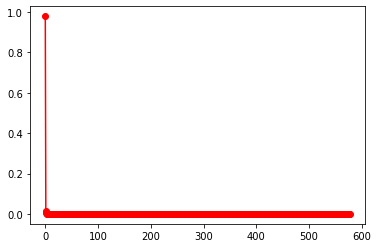

0.9998024473417808


In [77]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro-')
plt.show()
print(sum(variance_ratio[0:10]))

In [80]:
names_2d = pd.DataFrame(zip(part4['Area name'], pca_data[:, 0], pca_data[:, 1]), columns=['Names', 'PC1', 'PC2'])

%matplotlib qt
plt.figure(figsize=(15, 15))
plt.scatter(names_2d['PC1'].values, names_2d['PC2'].values, alpha=0)
for i, text in enumerate(names_2d['Names'].values):
    plt.annotate(text, (names_2d['PC1'][i], names_2d['PC2'][i]), fontsize=7)

In [79]:
part4

,FIPS code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,2012 Population (persons) 1/.1,2013 Population (persons) 1/.1,2014 Population (persons) 1/.1,2015 Population (persons) 1/.1,2016 Population (persons) 1/.1,2017 Population (persons) 1/.1,2018 Population (persons) 1/.1,2019 Population (persons) 1/.1,2020 Population (persons) 1/.1,2021 Population (persons) 1/.1
0,1001,Alabama,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,55558,55594,56034,56278,56954,57371,57728,58245,58877,59095
1,1003,Alabama,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,190941,196067,200759,204925,210004,215365,221132,227079,233140,239294
2,1005,Alabama,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,27320,27158,27043,26633,26217,25608,25380,25205,25180,24964
3,1007,Alabama,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,...,22682,22544,22586,22607,22654,22606,22383,22405,22223,22477
4,1009,Alabama,Blount County,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,...,57857,58024,58048,58168,58238,58676,58765,58956,59081,59041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,56037,Wyoming,Sweetwater County,5.0,8.0,5.0,8.0,4393.0,3731.0,986.0,...,44909,45010,44763,44492,43979,43277,42755,42434,42158,41614
2712,56039,Wyoming,Teton County,7.0,8.0,7.0,8.0,708.0,908.0,524.0,...,21612,22287,22737,23002,23157,23270,23134,23242,23347,23575
2713,56041,Wyoming,Uinta County,7.0,8.0,7.0,8.0,1569.0,1517.0,445.0,...,21058,21040,20928,20891,20846,20604,20475,20393,20441,20635
2714,56043,Wyoming,Washakie County,7.0,11.0,7.0,11.0,1572.0,1437.0,590.0,...,8386,8381,8231,8224,8112,7936,7800,7728,7658,7705
